<a href="https://colab.research.google.com/github/Inaldo-Barros/-Cria-o-de-Uma-Base-de-Dados-e-Treinamento-da-Rede-YOLO/blob/main/Criacao_base_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
from IPython.display import Image, display

# Montar o Google Drive (opcional, se você quiser salvar ou carregar dados do Google Drive)

In [20]:
from google.colab import drive
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/Exemplos/exemplo.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clonar o repositório YOLOv5

In [21]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5/yolov5/yolov5


# Carregar e preparar os dados
# Por simplicidade, vamos usar um dataset público já anotado como COCO (você pode substituir com seu próprio dataset)

In [22]:
!curl -L "http://images.cocodataset.org/zips/train2017.zip" -o train2017.zip
!curl -L "http://images.cocodataset.org/annotations/annotations_trainval2017.zip" -o annotations_trainval2017.zip
!unzip -q train2017.zip -d /content/dataset
!unzip -q annotations_trainval2017.zip -d /content/dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 59 18.0G   59 10.7G    0     0  14.6M      0  0:20:58  0:12:31  0:08:27 15.7M^C
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  16.7M      0  0:00:14  0:00:14 --:--:-- 19.7M
[train2017.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train2017.zip or
        train2017.zip.zip, and cannot find train2017.zip.ZIP, period.
replace /content/dataset/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /conten

# Crie um arquivo de configuração de dados (dataset.yaml)

In [23]:
dataset_yaml = """
train: /content/dataset/train2017
val: /content/dataset/val2017

nc: 80  # número de classes (COCO tem 80 classes)
names: [ 'person', 'bicycle', 'car', ... ]  # adicione todas as 80 classes do COCO
"""
with open('/content/yolov5/dataset.yaml', 'w') as file:
    file.write(dataset_yaml)

# Treinar o modelo

In [24]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/yolov5/dataset.yaml --weights

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-23 11:57:50.041441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-23 11:57:50.072732: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-23 11:57:50.081738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
usage:

# Realizar inferência usando o modelo treinado

In [25]:
!python detect.py --source /content/dataset/val2017 --weights runs/train/exp/weights/best.pt --img 640

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/dataset/val2017, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu121 CPU

Traceback (most recent call last):
  File "/content/yolov5/yolov5/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/yolov5/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/yolov5/yolov5/yolov5/de

# Realizar a detecção de objetos na imagem carregada

In [26]:
!python detect.py --source {image_path} --weights runs/train/exp/weights/best.pt --img 640

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Exemplos/exemplo.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu121 CPU

Traceback (most recent call last):
  File "/content/yolov5/yolov5/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/yolov5/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/yolo

# Exibir a imagem com as detecções

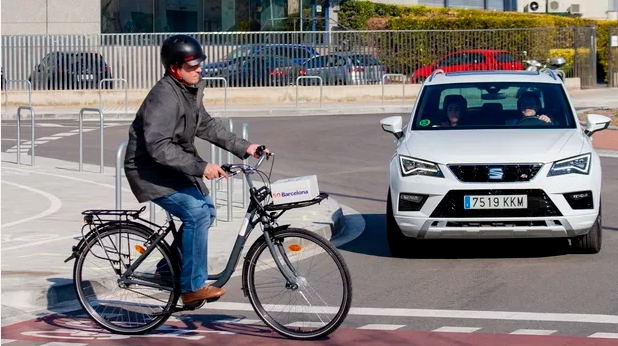

In [27]:
# Diretório onde a imagem de saída deve ser salva
output_dir = '/content/drive/MyDrive/Exemplos'

# Verifique se a imagem foi salva no diretório de saída
if os.path.exists(output_dir):
    output_files = os.listdir(output_dir)
    if output_files:
        # Exibir a primeira imagem encontrada no diretório de saída
        display(Image(filename=os.path.join(output_dir, output_files[0])))
    else:
        print("Nenhuma imagem encontrada no diretório de saída.")
else:
    print(f"O diretório {output_dir} não foi encontrado.")